In [ ]:
#@title Librerías
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

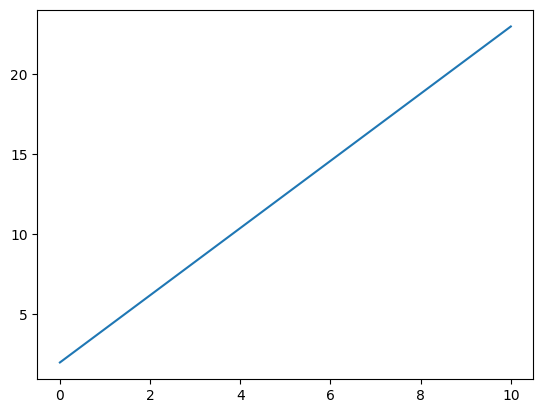

In [ ]:
#@title Modelo ideal
#Datos sintéticos
x = np.linspace(0,10,100)
b = 2
y = 2.1*x + b
plt.plot(x,y)

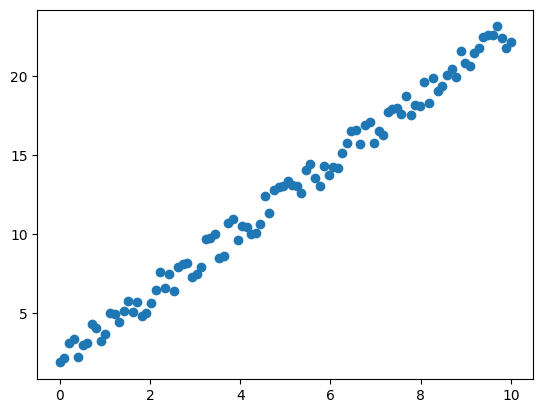

In [ ]:
#@title Con ruído
N = 100
rng = 0.5*(2*np.random.random(N)-1)
x = np.linspace(0,10,N)
b = 2
y = 2.1*(x+rng) + b
plt.plot(x,y,'o');

In [ ]:
#Ahora usemos curvefit
def funcion(x,a,b):
  return a*x + b
params_fit = curve_fit(funcion,x,y)

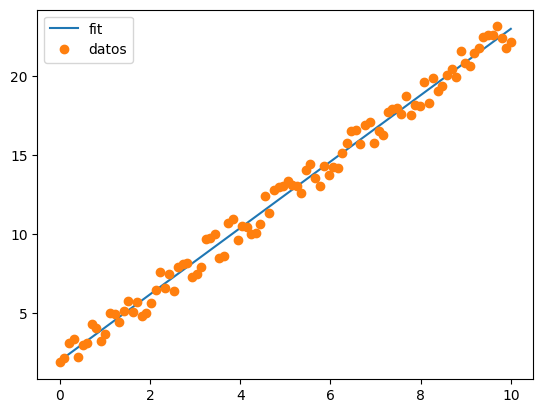

In [ ]:
x = np.linspace(min(x),max(x),100)
y_fit = funcion(x,*params_fit[0])
plt.plot(x,y_fit, label='fit')
plt.plot(x,y,'o',label='datos')
plt.legend();

In [ ]:
file = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQcAmpwArSlijSjVvoWk9nVd-IhFcpZBPRhE2lw2DC21eaC8oMSnwlfXITpJGSTL0hHJaQiJ5g89-gp/pub?output=csv'
df = pd.read_csv(file, sep=';', decimal='.')
df = df.rename(columns={'Tiempo (ms)': 'Tiempo_ms', 'Ángulo 1,':'AnguloDeg'})
df.AnguloDeg = df.AnguloDeg.str.replace(',','.').astype(float)
df['AnguloRad'] = np.deg2rad(df.AnguloDeg)
df

,Tiempo_ms,AnguloDeg,AnguloRad
0,9,59.289612,1.034799
1,42,59.982327,1.046889
2,75,61.237453,1.068795
3,108,63.492477,1.108153
4,142,65.388771,1.141249
...,...,...,...
2842,94709,94.937576,1.656973
2843,94743,96.479851,1.683891
2844,94776,97.940689,1.709387
2845,94809,99.318092,1.733428


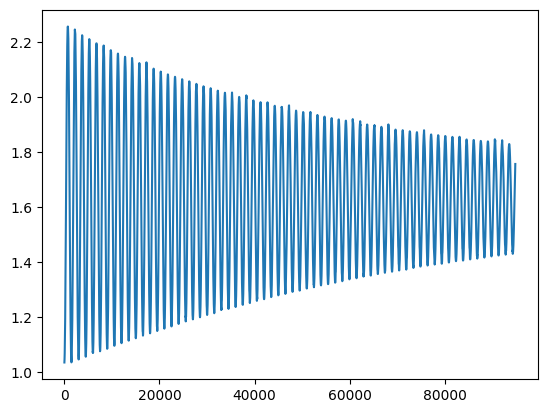

In [ ]:
plt.plot(df.Tiempo_ms, df.AnguloRad);

In [ ]:
#Ahora realicemos el curve_fit.
def exponencial(t,alpha,omega,phi,cte,a):
  return a*np.exp(-alpha*t)*np.sin(omega*t+ phi) + cte
params_fit2 = curve_fit(exponencial,(df.Tiempo_ms/1000),df.AnguloRad)
params_fit2[0]

array([ 0.01261671,  4.19498078, -1.73654568,  1.63193063,  0.61320963])

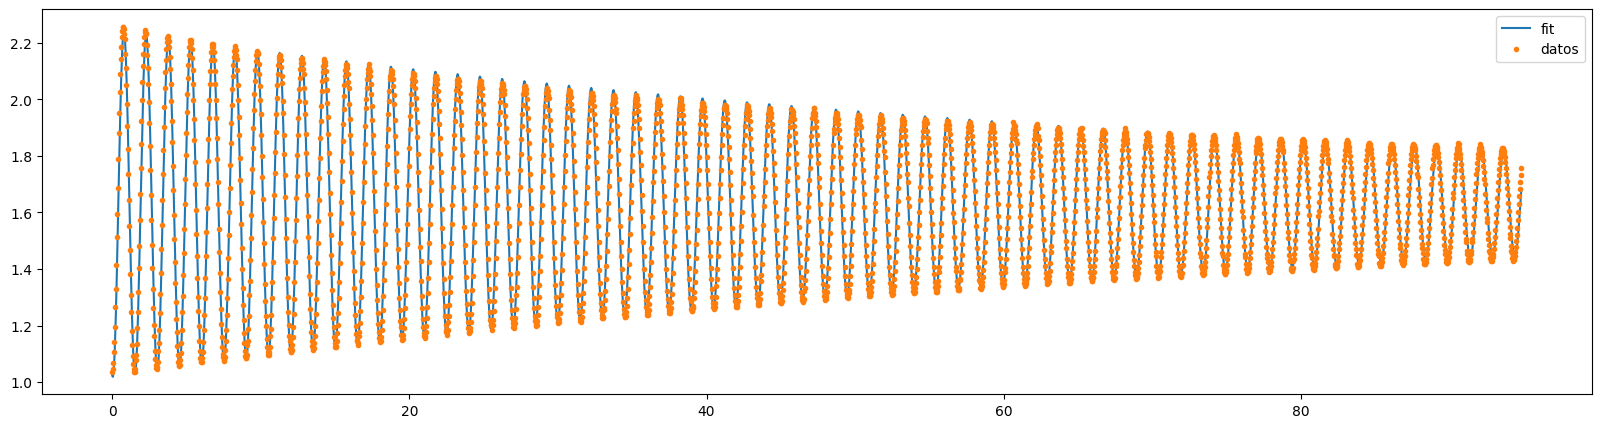

In [ ]:
x_ = np.linspace(min((df.Tiempo_ms/1000)),max((df.Tiempo_ms/1000)),2846)
y_fit2 = exponencial(x_,*params_fit2[0])
plt.figure(figsize=(20,5))
plt.plot((x_),y_fit2, label='fit')
plt.plot((df.Tiempo_ms/1000), df.AnguloRad,'.',label='datos')
plt.legend();